In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import duckdb

sns.set_style()

%load_ext sql
%config SqlMagic.autopandas = True

Deploy Streamlit apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [2]:
from src.datasets import daocensus_text, daocensus
# from src.datasets

In [3]:
ORG_NAME = 'Decentraland'
DCT_PATH = Path("./data/daos-census-text")
# DCT_PATH = Path("./data/daos-census")

dfv, dfp = daocensus_text.get(DCT_PATH, ORG_NAME, 'snapshot')
dfv.info()

Warning, removing 116560 votes without proposal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116560 entries, 0 to 116559
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   platform       116560 non-null  object        
 1   name           116560 non-null  object        
 2   id             116560 non-null  object        
 3   proposal       116560 non-null  category      
 4   deployment     116560 non-null  object        
 5   platform_vote  116560 non-null  object        
 6   voter          116560 non-null  category      
 7   date           116560 non-null  datetime64[ns]
 8   choice         116560 non-null  object        
 9   weight         116560 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), object(6)
memory usage: 8.5+ MB


In [4]:
dfv_old, dfp_old = daocensus.get("./data/daos-census", ORG_NAME, 'snapshot')

In [5]:
print(f'Len dfv_old: {len(dfv_old)}, dfv: {len(dfv)}')
print(f'Len dfp_old: {len(dfp_old)}, dfp: {len(dfp)}, {dfp["id"].nunique()}')

Len dfv_old: 116560, dfv: 116560
Len dfp_old: 1942, dfp: 1943, 1943


Hay propuestas nuevas, pero no tenemos los votos de esas propuestas

In [6]:
new_props = dfp[~dfp['id'].isin(dfp_old['id'])]
new_props

,platform,name,platform_deployment,id,deployment,platform_proposal,author,date,votes_count,title,description,start,end
233,snapshot,Decentraland,snapshot.dcl.eth,d2e7f401-7e51-56f5-84be-6819cdca8034,41fd8de5-f8e2-5023-86a3-825c49e9ad7f,Qme5zXJNfVSPzyiESQMnyx39MaJduX9MZEaTnmQ8Unj8ZR,0x5e23d08324f017d5425e59a2782c9ae27ace0958,2021-12-03 06:26:25,131,Change the price of claiming a unique name,> by 0xe83fcc89fb8fdd63eb542be01420d24257f28bc...,2021-12-03 06:26:00,2021-12-10 06:26:00


# Exploración del dataset

## Distribución de DAOs en plataformas

In [7]:
db = duckdb.connect(database=':memory:', read_only=False)
db.execute("CREATE VIEW deployments AS SELECT * FROM parquet_scan('{}')".format(DCT_PATH / "raw/deployments.parquet"))
db.execute("CREATE VIEW votes AS SELECT * FROM parquet_scan('{}')".format(DCT_PATH / "raw/votes.parquet"))
db.execute("CREATE VIEW proposals AS SELECT * FROM parquet_scan('{}')".format(DCT_PATH / "raw/proposals.parquet"))

%sql db --alias duckdb

In [8]:
db.execute("SHOW TABLES").fetchdf()

,name
0,deployments
1,proposals
2,votes


In [9]:
%%sql
SHOW TABLES

Running query in 'duckdb'

,name


In [10]:
%%sql
SELECT * FROM duckdb_columns() WHERE table_name IN ('votes', 'proposals')

Running query in 'duckdb'

,database_name,database_oid,schema_name,schema_oid,table_name,table_oid,column_name,column_index,internal,column_default,is_nullable,data_type,data_type_id,character_maximum_length,numeric_precision,numeric_precision_radix,numeric_scale
0,memory,992,main,994,votes,1391,id,1,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
1,memory,992,main,994,votes,1391,proposal_id,2,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
2,memory,992,main,994,votes,1391,deployment_id,3,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
3,memory,992,main,994,votes,1391,platform_vote_id,4,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
4,memory,992,main,994,votes,1391,voter,5,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
5,memory,992,main,994,votes,1391,date,6,False,None,True,TIMESTAMP,19,NaN,NaN,NaN,NaN
6,memory,992,main,994,votes,1391,choice,7,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
7,memory,992,main,994,votes,1391,weight,8,False,None,True,"DECIMAL(38,4)",21,NaN,38.0,10.0,4.0
8,memory,992,main,994,proposals,1393,id,1,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN
9,memory,992,main,994,proposals,1393,deployment_id,2,False,None,True,VARCHAR,25,NaN,NaN,NaN,NaN


In [11]:
%%sql dfd_all <<
SELECT *
FROM deployments
LIMIT 100000

Running query in 'duckdb'

31135
\begin{tabular}{lr}
\toprule
{} &      0 \\
platform &        \\
\midrule
aragon   &   2387 \\
daohaus  &   3528 \\
daostack &     58 \\
governor &    885 \\
realms   &   2287 \\
snapshot &  19615 \\
tally    &   2375 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1285330/3783201631.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ndaos.to_latex())


<Axes: xlabel='platform'>

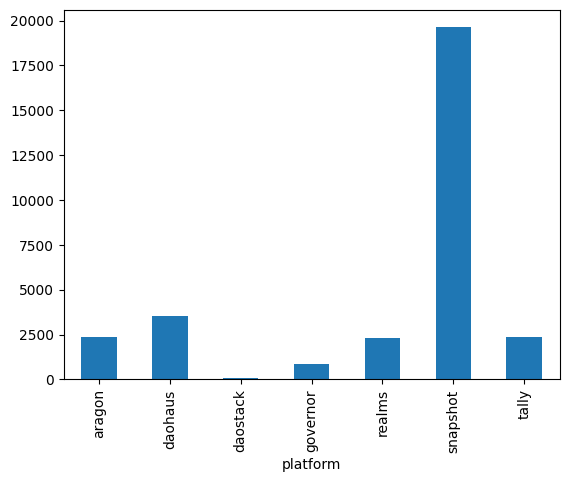

In [12]:
ndaos = dfd_all.groupby('platform').size()
print(ndaos.sum())
print(ndaos.to_latex())
ndaos.plot.bar()

In [13]:
%%sql dfd <<
SELECT *
FROM deployments
WHERE platform IN ('aragon', 'daohaus', 'daostack', 'snapshot')
LIMIT 100000

Running query in 'duckdb'

platform
aragon       2387
daohaus      3528
daostack       58
snapshot    19615
dtype: int64
25588


<Axes: xlabel='platform'>

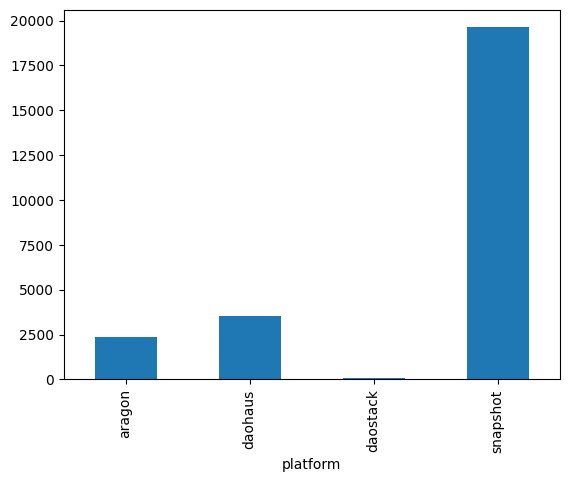

In [14]:
ndaos = dfd.groupby('platform').size()
print(ndaos)
print(ndaos.sum())
ndaos.plot.bar()

## Cantidad total de votos/ etc por plataforma

In [15]:
%%sql dfcnt <<
SELECT * FROM (
    SELECT 
        platform, 
        COUNT(DISTINCT deployments.id) as ndeployments, 
        COUNT(*) as nvotes, 
        COUNT(DISTINCT voter) as nvoters,
    FROM deployments
    LEFT JOIN votes ON (deployments.id = votes.deployment_id)
    GROUP BY platform
)
LEFT JOIN (
    SELECT 
        platform, 
        COUNT(DISTINCT deployments.id) as ndeployments, 
        COUNT(*) AS nproposals
    FROM deployments
    LEFT JOIN proposals ON (deployments.id = proposals.deployment_id)
    GROUP BY platform   
) USING(platform)

Running query in 'duckdb'

In [16]:
display(dfcnt)
print(dfcnt.set_index('platform').sum())

print((dfcnt
    .set_index('platform')[['ndeployments', 'nvotes', 'nvoters', 'nproposals']]
    .sort_index()
    .style
    .format(lambda x: '{:,d}'.format(x).replace(',', ' '))
).to_latex())

,platform,ndeployments,nvotes,nvoters,ndeployments_2,nproposals
0,daostack,58,12331,519,58,3575
1,tally,2375,556988,187976,2375,2375
2,snapshot,19615,20951104,4849174,19615,106504
3,governor,885,413578,84299,885,885
4,aragon,2387,27581,4358,2387,16598
5,daohaus,3528,52033,5816,3528,48866
6,realms,2287,33214,6934,2287,2287


ndeployments         31135
nvotes            22046829
nvoters            5139076
ndeployments_2       31135
nproposals          181090
dtype: int64
\begin{tabular}{lrrrr}
 & ndeployments & nvotes & nvoters & nproposals \\
platform &  &  &  &  \\
aragon & 2 387 & 27 581 & 4 358 & 16 598 \\
daohaus & 3 528 & 52 033 & 5 816 & 48 866 \\
daostack & 58 & 12 331 & 519 & 3 575 \\
governor & 885 & 413 578 & 84 299 & 885 \\
realms & 2 287 & 33 214 & 6 934 & 2 287 \\
snapshot & 19 615 & 20 951 104 & 4 849 174 & 106 504 \\
tally & 2 375 & 556 988 & 187 976 & 2 375 \\
\end{tabular}



## Propuestas con info textual

In [17]:
%%sql dfpall <<
SELECT * 
FROM deployments
LEFT JOIN proposals ON deployments.id = proposals.deployment_id
WHERE platform IN ('aragon', 'daohaus', 'daostack', 'snapshot')

Running query in 'duckdb'

In [18]:
def pctText(group):
    return 1 - pd.isnull(group[['title', 'description']]).any(axis=1).mean()

print(pctText(dfpall))
dfpall.groupby('platform').apply(pctText)

0.6942800339517953


platform
aragon      0.089951
daohaus     0.358695
daostack    0.987692
snapshot    0.932585
dtype: float64

## DAOs relevantes

In [19]:
db.execute("DESCRIBE votes").fetchdf()

,column_name,column_type,null,key,default,extra
0,id,VARCHAR,YES,None,None,NaN
1,proposal_id,VARCHAR,YES,None,None,NaN
2,deployment_id,VARCHAR,YES,None,None,NaN
3,platform_vote_id,VARCHAR,YES,None,None,NaN
4,voter,VARCHAR,YES,None,None,NaN
5,date,TIMESTAMP,YES,None,None,NaN
6,choice,VARCHAR,YES,None,None,NaN
7,weight,"DECIMAL(38,4)",YES,None,None,NaN


In [20]:
%%sql
SELECT * EXCLUDE (name),
    name AS deployment_name,
    CASE
        WHEN name IN ('dxDAO', 'xDXdao') THEN 'dxDAO / xDXdao'
        WHEN name IN ('Aave', 'Aavegotchi') THEN 'Aave / Aavegotchi'
        ELSE name
    END AS name
FROM deployments

Running query in 'duckdb'

,id,platform,platform_deployment_id,website,additional,votes_count,proposals_count,deployment_name,name
0,1fe442f5-891f-5a6f-b3a1-1b846a7a8b70,snapshot,stgdao.eth,https://snapshot.org/#/stgdao.eth,"stargatefinance, https://stargate.finance/",5986069,58,Stargate DAO,Stargate DAO
1,eeed4e65-5607-59e2-a003-fddc8db9ff09,snapshot,linea-build.eth,https://snapshot.org/#/linea-build.eth,"LineaBuild, https://linea.build/",3116713,2,Linea,Linea
2,b6c95a58-d36d-5482-9fa0-fffbbed6e20a,snapshot,aave.eth,https://snapshot.org/#/aave.eth,AaveAave,2020544,367,Aave,Aave / Aavegotchi
3,25098163-1cfd-5ad9-9bdc-f4e00b1d611e,snapshot,opcollective.eth,https://snapshot.org/#/opcollective.eth,"optimismPBC, https://optimism.io",1142459,93,Optimism Collective,Optimism Collective
4,725ff450-578f-5bb8-9caf-75599c2fd5ab,snapshot,magicappstore.eth,https://snapshot.org/#/magicappstore.eth,"MagicSquareio, https://magic.store/",899961,122,Magic Square,Magic Square
...,...,...,...,...,...,...,...,...,...
31130,0364831b-9111-5230-8acf-3a98650e5c14,realms,jdaoDN37BrVRvxuXSeyR7xE5Z9CAoQApexGrQJbnj6V_5g...,None,None,10,7,Jungle DeFi Community DAO,Jungle DeFi Community DAO
31131,9ab9fb7f-6e48-563a-8ab3-d44d6f9b3729,realms,jdaoDN37BrVRvxuXSeyR7xE5Z9CAoQApexGrQJbnj6V_2S...,None,None,0,0,Jungle DeFi DAO,Jungle DeFi DAO
31132,bb6ccc0c-6b4c-5581-928a-9f0725b4f104,realms,GmtpXy362L8cZfkRmTZMYunWVe8TyRjX5B7sodPZ63LJ_2...,None,None,155,58,Metaplex Foundation,Metaplex Foundation
31133,182de5a5-65bd-5f7d-9a47-cb5e795e6b35,realms,GMpXgTSJt2nJ7zjD1RwbT2QyPhKqD2MjAZuEaLsfPYLF_C...,None,None,56,22,Metaplex Genesis,Metaplex Genesis


In [21]:
%%sql
CREATE OR REPLACE VIEW orgs AS
    WITH G AS (WITH Gv AS (
            SELECT *,
                CASE
                    WHEN name IN ('dxDAO', 'xDXdao') THEN 'dxDAO / xDXdao'
                    WHEN name IN ('Aave', 'Aavegotchi') THEN 'Aave / Aavegotchi'
                    WHEN name IN ('MetaCartel Ventures', 'MetaCartel xDai', 'MetaCartel DAO') THEN 'Metacartel'
                    ELSE name
                END AS orgname
            FROM deployments
            LEFT JOIN votes ON (deployments.id = votes.deployment_id)
            -- WHERE platform IN ({platforms})
        )
        SELECT 
            orgname AS name,
            COUNT(DISTINCT Gv.id) AS n_deploys,
            LIST(DISTINCT Gv.id) AS deploys,
            COUNT(DISTINCT Gv.proposal_id) AS proposals_count,
            COUNT(DISTINCT Gv.voter) AS voters_count,
            COUNT(*) AS votes_count,
        FROM Gv
        GROUP BY Gv.orgname
    )
    SELECT
        *,
        proposals_count + voters_count AS nodes,
        2*(votes_count)/((voters_count + proposals_count)*(voters_count + proposals_count-1)) AS density_naive,
        2*(votes_count)/(voters_count*proposals_count) AS density,
        votes_count/proposals_count AS vpp, 
        votes_count/voters_count AS vpv
    FROM G
    ORDER BY proposals_count DESC

Running query in 'duckdb'

,Count


In [22]:
%%sql
SELECT * 
FROM orgs
LIMIT 100000

Running query in 'duckdb'

,name,n_deploys,deploys,proposals_count,voters_count,votes_count,nodes,density_naive,density,vpp,vpv
0,None,3136,"[cee5c9d4-44fc-5196-9776-f60f2e9e4b7f, ce61bef...",9855,2695,20264,12550,0.000257,0.001526,2.056215,7.519109
1,DEAD FoundationsDAO,1,[c37abcdd-a36b-51fc-8fa6-2c3ecb780df0],5591,3469,17738,9060,0.000432,0.001829,3.172599,5.113289
2,PancakeSwap,2,"[e2ec62ae-9b29-5f3a-a541-58678bb64a1b, 1213b93...",2691,129978,532831,132669,0.000061,0.003047,198.004831,4.099394
3,dxDAO / xDXdao,2,"[5deda895-4531-539a-b7dc-88797456ded7, d322959...",2226,193,8479,2419,0.002899,0.039472,3.809075,43.932642
4,Decentraland,3,"[7117d5c4-de0e-5e4c-872d-40c3bd4b0200, 36a86d4...",2060,7334,116880,9394,0.002649,0.015473,56.737864,15.936733
...,...,...,...,...,...,...,...,...,...,...,...
25784,Yue DAO,1,[518509c1-5eec-5eeb-9a29-5e9f2266edd3],0,0,1,0,NaN,NaN,NaN,NaN
25785,sky88,1,[6941b4ae-5727-5fec-bd4b-35296d74593a],0,0,1,0,NaN,NaN,NaN,NaN
25786,DRC_Mobility,1,[dd3ee1cf-dc7b-5255-a14c-23216ed4bb8d],0,0,1,0,NaN,NaN,NaN,NaN
25787,Zak Realms,1,[1e032740-7624-5cc9-992b-27634bc77382],0,0,1,0,NaN,NaN,NaN,NaN


In [23]:
%%sql
SELECT *
FROM deployments
LEFT JOIN (
    SELECT deployment_id, COUNT(DISTINCT voter) AS nvoters
    FROM votes
    GROUP BY deployment_id
) AS v ON deployments.id = v.deployment_id
LEFT JOIN (
    SELECT deployment_id, COUNT(*) AS nproposals
    FROM proposals
    GROUP BY deployment_id
) AS p ON deployments.id = p.deployment_id
WHERE nvoters >= 3 AND platform IN ('aragon', 'daohaus', 'daostack', 'snapshot')

Running query in 'duckdb'

,id,platform,platform_deployment_id,name,website,additional,votes_count,proposals_count,deployment_id,nvoters,deployment_id_2,nproposals
0,a06bba9f-53b3-5730-b5bb-08201b810ca0,snapshot,elon6.eth,BigDAO,https://snapshot.org/#/elon6.eth,nan,702,5,a06bba9f-53b3-5730-b5bb-08201b810ca0,365,a06bba9f-53b3-5730-b5bb-08201b810ca0,5.0
1,bcc25bab-b877-5868-b020-8cd5b56d8e65,snapshot,uselesscrypto.eth,Useless,https://snapshot.org/#/uselesscrypto.eth,"uselesscrypto, https://www.uselesscrypto.com/",240,13,bcc25bab-b877-5868-b020-8cd5b56d8e65,77,bcc25bab-b877-5868-b020-8cd5b56d8e65,13.0
2,3a1ebe8e-1a4e-536d-9e69-6d2cbd6001ce,snapshot,varen.eth,Varen,https://snapshot.org/#/varen.eth,nan,471,25,3a1ebe8e-1a4e-536d-9e69-6d2cbd6001ce,122,3a1ebe8e-1a4e-536d-9e69-6d2cbd6001ce,31.0
3,ef1bc9ab-5db7-5bc6-9305-f60ec900e16e,snapshot,hakka.eth,Hakka Finance,https://snapshot.org/#/hakka.eth,hakkafinance,1559,15,ef1bc9ab-5db7-5bc6-9305-f60ec900e16e,515,ef1bc9ab-5db7-5bc6-9305-f60ec900e16e,16.0
4,9ca1b0a6-2b9c-5fee-acd5-562144b3a4ba,snapshot,prophetfinance.eth,prophet.finance,https://snapshot.org/#/prophetfinance.eth,nan,45,12,9ca1b0a6-2b9c-5fee-acd5-562144b3a4ba,31,9ca1b0a6-2b9c-5fee-acd5-562144b3a4ba,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8070,24ec6c33-8f1a-50e2-8fe9-778fb09fb727,snapshot,massnomis.eth,21Fi,https://snapshot.org/#/massnomis.eth,nan,22,17,24ec6c33-8f1a-50e2-8fe9-778fb09fb727,10,24ec6c33-8f1a-50e2-8fe9-778fb09fb727,17.0
8071,dc8597e3-871b-58cf-ab76-fefe5b1d7f21,snapshot,wuwuershiwu.eth,Erhu Com,https://snapshot.org/#/wuwuershiwu.eth,nan,3,3,dc8597e3-871b-58cf-ab76-fefe5b1d7f21,3,dc8597e3-871b-58cf-ab76-fefe5b1d7f21,5.0
8072,9cbd00d2-c6b7-515f-9670-1eccc15199d9,snapshot,webn.eth,兔子洞投票人物,https://snapshot.org/#/webn.eth,nan,326,10,9cbd00d2-c6b7-515f-9670-1eccc15199d9,314,None,NaN
8073,e6ddd4a1-a9eb-5feb-8e97-061f4fef71cb,snapshot,otb-spa.eth,OTB-SpA,https://snapshot.org/#/otb-spa.eth,nan,16,1,e6ddd4a1-a9eb-5feb-8e97-061f4fef71cb,16,None,NaN


In [24]:
%%sql
SELECT platform, name, platform_deployment_id, proposals.*
FROM deployments
LEFT JOIN proposals ON (deployments.id = proposals.deployment_id)
WHERE lower(name) LIKE 'dxdao' AND date < '2021-01-01'

Running query in 'duckdb'

,platform,name,platform_deployment_id,id,deployment_id,platform_proposal_id,author,date,votes_count,title,description,start,end
0,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,4664058c-09d3-57de-8db7-24590e824bd8,d3229595-ac4c-55bf-9808-386fc5603bd1,0x003c109411e96e5607ce609278536262e12afdaa65ab...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:52:32,5,dxwallet.eth set resolver contract,Setting ENS resolver contracts for dxDAO domai...,2020-03-14 17:52:32,2020-03-22 19:54:21
1,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,67bacc91-2e6b-5b4a-bc60-3b7681d91160,d3229595-ac4c-55bf-9808-386fc5603bd1,0x011f8609171d99705dda26d2d82cdcc691cdf8916997...,0x3111327edd38890c3fe564afd96b4c73e8101747,2020-09-30 16:12:28,6,Worker payout 09/20-10/20 - KadenZipfel,As per: https://alchemy.daostack.io/dao/0x519b...,2020-09-30 16:12:28,2020-10-08 16:15:24
2,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,ec5901f3-f5ee-55e0-9732-bbe2b92d19fc,d3229595-ac4c-55bf-9808-386fc5603bd1,0x019e094131fce8511813564de0816bc56e368ed4c0b4...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-07-06 04:44:13,7,Worker Propsoal 07/2020 of github: nicoelzer,"## Timeframe\n\nFrom 06/07/2020 to 07/08/2020,...",2020-07-06 04:44:13,2020-07-14 05:17:47
3,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,706c88b9-e6e9-5cc7-9d2f-6eb313c40553,d3229595-ac4c-55bf-9808-386fc5603bd1,0x0204690f98f4706695e41d5e26a68b32f1d2bdcde0d1...,0x3111327edd38890c3fe564afd96b4c73e8101747,2020-09-30 16:46:30,6,Worker proposal 10/20-12/20 - KadenZipfel,"# Timeframe\nTwo months, from October 8th, 202...",2020-09-30 16:46:30,2020-10-08 17:46:17
4,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,9398a2de-975d-582e-8eb5-aa4668372adb,d3229595-ac4c-55bf-9808-386fc5603bd1,0x0371113dbfeaece670c1dc4a67b1b0cfe21f0c1149f2...,0x583acc79585d3cb195ea8125f6f80ad459b46313,2020-12-03 02:51:33,2,Swapr Relayer Re-Audit and FeeReceiver Audit P...,This proposal covers two audits.\n\nThe first ...,2020-12-03 02:51:33,2020-12-11 02:56:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,8e268253-fe3a-5f2d-a161-33aa9dfb89ff,d3229595-ac4c-55bf-9808-386fc5603bd1,0xfd9b0b9f2b020c8fc02b64d1c2f08de17972c2545984...,0xb33b9fba681653fe263b31a95766d83d18c2128d,2020-03-14 17:35:15,1,dxoasis.eth set resolver contract,Setting ENS resolver contracts for dxDAO domai...,2020-03-14 17:35:15,2020-04-29 16:19:17
428,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,0dfcb126-d3e0-5bf6-86c9-6c109634e50b,d3229595-ac4c-55bf-9808-386fc5603bd1,0xfe6f5cbdeb29a4a95dfa194726684b53f9374eeaf553...,0xabd238fa6b6042438fbd22e7d398199080b4224c,2020-10-29 05:02:10,6,Worker Proposal from 09/20 to 10/20 (SkyMine L...,This proposal executes the adjusted 2nd payout...,2020-10-29 05:02:10,2020-11-06 08:16:38
429,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,79cf31df-b4f2-5315-ad4a-3820fd7156de,d3229595-ac4c-55bf-9808-386fc5603bd1,0xfec7c64a5e784fe4315efeb89d491cba59cfa72a617b...,0x3111327edd38890c3fe564afd96b4c73e8101747,2020-11-30 01:22:51,3,Worker Payout 10/20-11/20 - Kaden Zipfel,As per: https://alchemy.daostack.io/dao/0x519b...,2020-11-30 01:22:51,2020-12-08 01:54:54
430,daostack,dxDAO,0x519b70055af55a007110b4ff99b0ea33071c720a,6aa021f4-cb4e-5b27-bf50-26d3bb88ca33,d3229595-ac4c-55bf-9808-386fc5603bd1,0xff7a8b3b939be7badadf89f1bca8e744de774630c6fa...,0xb5806a701c2ae0366e15bde9be140e82190fa3d6,2020-09-22 02:40:24,5,Worker Proposal | FT Product Manager & UI/UX,"Hey guys, I’m Zett from Keybase chat. I’m a pr...",2020-09-22 02:40:24,2020-09-30 02:46:36


In [25]:
%%sql
SELECT *, (
    SELECT MAX(date) 
    FROM votes 
    WHERE votes.deployment_id = deployments.id
    ) AS last_vote
FROM deployments
WHERE LOWER(name) LIKE '%pancake%'

Running query in 'duckdb'

,id,platform,platform_deployment_id,name,website,additional,votes_count,proposals_count,last_vote
0,e2ec62ae-9b29-5f3a-a541-58678bb64a1b,snapshot,cakevote.eth,PancakeSwap,https://snapshot.org/#/cakevote.eth,nan,532830,2744,2023-07-20 03:54:45
1,d054cadd-b6c2-57bd-ab40-11edb331bcd2,daohaus,0xf3c71145af7c3eac982731cbff4f6618155b2ff3,Pancakepoll,nan,network: xdai version: 2.1,0,0,NaT
2,1213b93e-bf81-5b77-bcb9-ddbc6fb4aed3,governor,15117e3a-4148-454c-8d54-771edd3f1a4c,PancakeSwap,nan,nan,0,0,NaT


### Best orgs for RecSys

In [26]:
def best_orgs_for_recsys(
    min_proposals=500, 
    min_voters=100, 
    min_density=0.001, 
    order_by='proposals_count', 
    limit=10000, 
    platforms=['aragon', 'daohaus', 'daostack', 'snapshot'],
):
    platforms = ", ".join(f"'{p}'" for p in platforms)
    df = db.execute(f"""
    SELECT
        *,
    FROM orgs
    WHERE density > {min_density} 
        AND proposals_count > {min_proposals} 
        AND voters_count > {min_voters}
    ORDER BY proposals_count DESC
    LIMIT {limit}
    """).fetchdf().dropna()

    df['milli density'] = 1000 * df['density']

    return df

best_orgs = best_orgs_for_recsys(min_density=0)
best_orgs

,name,n_deploys,deploys,proposals_count,voters_count,votes_count,nodes,density_naive,density,vpp,vpv,milli density
1,DEAD FoundationsDAO,1,[c37abcdd-a36b-51fc-8fa6-2c3ecb780df0],5591,3469,17738,9060,0.000432,0.001829,3.172599,5.113289,1.829114
2,PancakeSwap,2,"[e2ec62ae-9b29-5f3a-a541-58678bb64a1b, 1213b93...",2691,129978,532831,132669,0.000061,0.003047,198.004831,4.099394,3.046744
3,dxDAO / xDXdao,2,"[5deda895-4531-539a-b7dc-88797456ded7, d322959...",2226,193,8479,2419,0.002899,0.039472,3.809075,43.932642,39.472275
4,Decentraland,3,"[7117d5c4-de0e-5e4c-872d-40c3bd4b0200, 41fd8de...",2060,7334,116880,9394,0.002649,0.015473,56.737864,15.936733,15.472556
5,Aave / Aavegotchi,6,"[377e7181-37e0-504d-b494-d26df613abdc, 73c10c9...",1140,87593,2360660,88733,0.000600,0.047281,2070.754386,26.950327,47.281276
6,Metacartel,5,"[b5c669ac-488c-5b91-82cc-e98add7af0b7, 545d907...",934,199,3288,1133,0.005127,0.035380,3.520343,16.522613,35.380328
7,Index Coop,2,"[17dba91a-e68f-50f6-8c1d-2d7fa57ab5fb, a25032f...",874,2871,24032,3745,0.003428,0.019155,27.496568,8.370603,19.154697
8,gm DAO,3,"[c3a8aa6c-1652-5834-a355-954bc422f1af, 360a8f2...",710,7712,91548,8422,0.002582,0.033439,128.940845,11.870851,33.439016
9,9K DAO,1,[5ecb2cca-8b8a-5c67-8867-569e5ca0a8ae],590,8170,102321,8760,0.002667,0.042454,173.425424,12.523990,42.454204
10,WEALTHDAO,1,[0c40474f-e4a0-540f-ab2f-0451336464f7],585,1041,4008,1626,0.003034,0.013163,6.851282,3.850144,13.162886


In [27]:
cols = {
    'name': 'Nombre',
    'proposals_count': '# Prop.',
    'voters_count': '# Votantes',
    'votes_count': '# Votos',
    'milli density': '‰ Densidad',
    'vpp': 'vpp',
    'vpv': 'vpv',
}

bof = best_orgs[cols.keys()]

style = (bof
    .style
    .format('{:.2f}', subset=bof.select_dtypes('float').columns)
    .format(thousands=' ', subset=bof.select_dtypes('int').columns)
    .relabel_index(list(cols.values()), axis='columns')
    .hide(axis='index')
)
display(style)
print(style.to_latex())

Nombre,# Prop.,# Votantes,# Votos,‰ Densidad,vpp,vpv
DEAD FoundationsDAO,5 591,3 469,17 738,1.83,3.17,5.11
PancakeSwap,2 691,129 978,532 831,3.05,198.00,4.10
dxDAO / xDXdao,2 226,193,8 479,39.47,3.81,43.93
Decentraland,2 060,7 334,116 880,15.47,56.74,15.94
Aave / Aavegotchi,1 140,87 593,2 360 660,47.28,2070.75,26.95
Metacartel,934,199,3 288,35.38,3.52,16.52
Index Coop,874,2 871,24 032,19.15,27.50,8.37
gm DAO,710,7 712,91 548,33.44,128.94,11.87
9K DAO,590,8 170,102 321,42.45,173.43,12.52
WEALTHDAO,585,1 041,4 008,13.16,6.85,3.85


\begin{tabular}{lrrrrrr}
Nombre & # Prop. & # Votantes & # Votos & ‰ Densidad & vpp & vpv \\
DEAD FoundationsDAO & 5 591 & 3 469 & 17 738 & 1.83 & 3.17 & 5.11 \\
PancakeSwap & 2 691 & 129 978 & 532 831 & 3.05 & 198.00 & 4.10 \\
dxDAO / xDXdao & 2 226 & 193 & 8 479 & 39.47 & 3.81 & 43.93 \\
Decentraland & 2 060 & 7 334 & 116 880 & 15.47 & 56.74 & 15.94 \\
Aave / Aavegotchi & 1 140 & 87 593 & 2 360 660 & 47.28 & 2070.75 & 26.95 \\
Metacartel & 934 & 199 & 3 288 & 35.38 & 3.52 & 16.52 \\
Index Coop & 874 & 2 871 & 24 032 & 19.15 & 27.50 & 8.37 \\
gm DAO & 710 & 7 712 & 91 548 & 33.44 & 128.94 & 11.87 \\
9K DAO & 590 & 8 170 & 102 321 & 42.45 & 173.43 & 12.52 \\
WEALTHDAO & 585 & 1 041 & 4 008 & 13.16 & 6.85 & 3.85 \\
HUWA-DAO & 572 & 1 331 & 4 151 & 10.90 & 7.26 & 3.12 \\
Balancer & 509 & 9 107 & 111 988 & 48.32 & 220.02 & 12.30 \\
\end{tabular}



In [28]:
# all_orgs[all_orgs['name'].str.lower().str.contains('dxdao')]

In [29]:
# all_orgs.sort_values('voters_count', ascending=False).head()

In [30]:
# all_orgs['voters_count'].describe(percentiles=[.5,.72,.9,.94,.99,.993])

In [31]:
# all_orgs['proposals_count'].describe(percentiles=[.5,.96])

In [32]:
# all_orgs['votes_count'].describe(percentiles=[.5,.55, .88, .98])

In [33]:
# best_orgs_for_recsys()

## Recalculate number of votes in each proposal

In [41]:
%%sql
SELECT * FROM votes LIMIT 10

Running query in 'duckdb'

,id,proposal_id,deployment_id,platform_vote_id,voter,date,choice,weight
0,a8b902cf-c6ee-5803-bcc6-a4263d832520,c3e93130-1eca-5709-9e86-d6ac3a9c1cad,d3229595-ac4c-55bf-9808-386fc5603bd1,0x000682a038b22925343bd5b9e84acb424a9d14884326...,0x91628ddc3a6ff9b48a2f34fc315d243eb07a9501,2023-03-14 02:47:23,Pass,9.024850e+22
1,444341a1-178e-5e95-8126-6ad1b7899735,70ec51fe-7cbc-5fbe-8ebf-c886ace664ff,d3229595-ac4c-55bf-9808-386fc5603bd1,0x001cde4d98e26191fc34308be3b51ce50d3eb9561b1b...,0xabd238fa6b6042438fbd22e7d398199080b4224c,2022-05-22 02:09:49,Pass,6.835964e+22
2,ec7349f9-4a69-5452-a16b-f253c9497211,a501deb0-2016-565e-bd90-9421bc215682,d3229595-ac4c-55bf-9808-386fc5603bd1,0x001e7617a24d4e379669db1b4be94aa5cdc1b735d492...,0x13a0b42b9c180065510615972858bf41d1972a55,2019-08-02 09:25:38,Pass,3.728463e+20
3,66822a7a-c8ed-5350-97d7-b4fc4281d5fa,23471a1b-4426-5a1d-add1-e0a739714d71,1ff410f5-1c80-53cd-9558-d93d1f6de121,0x00202af217d5d4f46006ee508af4d4a8e40fa0c58ea0...,0xba527d8301178a03a6993ab5a08cab06b975d5ae,2020-01-10 07:31:45,Pass,1.591787e+20
4,12a310f1-f56b-58b1-8601-216bfb0f1c6c,f7f54dfe-22fb-5a78-8523-39728010f525,6b5b7ac3-c21a-5dec-a79f-799b807f3a73,0x00230b335032c2f363d717da48d79d7574b1712580e0...,0xfc898b18a70ce49579f8d79a32e29928c15b4bc8,2020-02-27 10:45:15,Fail,1.957063e+21
5,2abf2c03-adbb-5a02-bbbb-5aea8375ce1d,b71db5e2-6b23-573e-8879-ef1115aa267f,9fb971b0-de3e-5651-96cf-ad330a9c660b,0x002ba58c240694ff4e62b13e54bcffd8f667c8e1b4ed...,0x77488ed6c9448e1a5dbe6772d6d31db85108a53e,2019-06-20 16:37:28,Pass,9.600000e+21
6,2907e2f9-9274-5892-a5f7-dd31eebafe4d,acfb8b5c-b20d-513a-8db9-e13a232506aa,1ff410f5-1c80-53cd-9558-d93d1f6de121,0x00381ed69d9ff204ba5e16eb71e615ec8cff3ac05b66...,0x144c4e5027b69f7798b2b162d924bcae5c149f15,2019-04-23 21:03:13,Pass,4.633097e+20
7,525d31a1-2b08-5f7d-b003-6615630d6b31,370e8509-060d-547c-bd5b-f75f9427b033,d3229595-ac4c-55bf-9808-386fc5603bd1,0x003b53eeeb314ab7fa42f88f8630d7fd6ea17184c1f0...,0xb0e83c2d71a991017e0116d58c5765abc57384af,2020-08-28 12:12:34,Pass,1.801618e+22
8,eca2ea76-8c1a-53c3-9e32-780160e0daaf,bcf10de1-fb7d-5904-938e-c8942712d595,d3229595-ac4c-55bf-9808-386fc5603bd1,0x003e74b43ea9d833d524b82c47c4e1b2b02f84506bd2...,0x91628ddc3a6ff9b48a2f34fc315d243eb07a9501,2023-03-26 15:16:47,Pass,9.024850e+22
9,1de990a1-178b-58f2-b45a-c124808fc47a,b1f193e6-cf73-5a7a-85f3-a84d95c08b97,d3229595-ac4c-55bf-9808-386fc5603bd1,0x00408d07ef8ea2f16f1b4eb0b76566e040ff85511826...,0xd8f515dad06a9f5b2cc761e5a108aa3eeb70c2b9,2019-07-23 03:44:56,Pass,2.477259e+20


In [48]:
%%sql
SELECT proposals.* EXCLUDE (votes_count), COUNT(votes) AS votes_count
FROM proposals
LEFT JOIN votes ON (proposals.id = votes.proposal_id)
GROUP BY proposals.*
LIMIT 20

Running query in 'duckdb'

,id,deployment_id,platform_proposal_id,author,date,title,description,start,end,votes_count
0,d88533bc-ed2a-5bc8-a6fb-f5fd9ac792b0,0ca3b44d-da0c-5efa-bbb8-e28355c34e23,0x632726577e9c186a8827311b8702dcfd98f26376237b...,0x3000d9B2c0E6B9F97f30ABE379eaAa8A85A04afC,2022-08-17 20:19:39,Gauge Weight for Week of 18th August 2022,Please read gauge voting rules before voting: ...,2022-08-18 02:00:00,2022-08-23 02:00:00,243
1,62eb7e02-de92-5bfa-af51-66789bd25110,8cd3fac1-efdc-5854-986c-b659e5491b35,0x5de0a7479576af5b30a8ddadf994e715ebbb2907dc9a...,0x8EadEb51b1B5dCecA24f8CE8cF33F8a6e10b0e37,2022-03-25 10:26:58,《廟公的 NFT 交換活動》,大德 OG 們平安！\n依照團隊於先前 AMA 中所承諾，廟公阿木導演將釋出手中珍藏的44尊...,2022-03-25 04:24:36,2022-04-01 04:00:00,32
2,5eba3705-9915-58aa-afaf-ccb3a179257e,bb7802d6-3b4f-5625-a044-9e854a2109a7,0x4fdba9c8351a9d9be653b692f0cf488c43d93e5fc4a0...,0x28C173B8F20488eEF1b0f48Df8453A2f59C38337,2022-01-31 17:59:24,JBP-95 - Pay Inceptor for her contributions in...,\n*One-time payouts are often made for short-t...,2022-02-01 00:00:00,2022-02-05 00:00:00,31
3,5d860949-2117-5af8-b061-e67e70719746,78da202e-2c9d-5e61-88cd-ad12bb9e4b55,QmarVE57RV3wQcVVfMKRXj8dQtTagqtgcvnXgG3DYvUfQF,0x24d01E58eEaF905527E1AF4A2ff7f16987d739Ac,2022-01-17 07:22:15,IDIP-1: Collaboration with Ghozali,"Summary\nIn this proposal, IreneDAO members wi...",2022-01-16 16:00:00,2022-01-21 15:59:00,98
4,b88ccf41-5232-5a3f-900d-f82e178398f1,e14ef56b-b24e-5e18-adfc-6e87f20bc3ff,QmNudMhJmKYdTFVpw58VAejiuDfVfwMyBifye3iPxmcJ3U,0xfCe3A97B5f1d3403F481903dA3679039F522089C,2021-10-04 16:04:21,RGP-4: RBN Token Activation Event,"Proposal for RBN “Token Activation Event”, a p...",2021-10-04 16:00:00,2021-10-07 12:00:00,550
5,6689b100-02e3-53a5-895e-f7142856f824,978f7a6b-504a-590f-9893-536301b55b6d,0xdbe5e1007c06dc0ba6cfa3a24021337988770c538c92...,0x9622c9354e21C1AEc03d77ad65d5d2aA7FB16Cf7,2021-12-23 16:09:20,YFDAI Governance Proposal - Enable multi-signa...,Proposed By Nath (@CryptoMoriarty) on behalf o...,2021-12-23 12:00:00,2021-12-28 12:00:00,32
6,68ee0276-3c1e-56cd-ac44-6d1f519f289a,7c037c7a-ba1c-5b5f-8a36-a8e621702f17,0x7668ff9005fce64e00c61bf3380b1b8f06a256687021...,0x02A76E34f224fCFB6FAccab1dDB6E91CdA7c8D5F,2021-12-12 02:54:08,test voting with NFT,This is a test proposal. APE Captial LPs can ...,2021-12-12 03:54:08,2021-12-19 03:54:08,32
7,df7fb5b4-e324-54ca-8808-f33c79b43b26,bb7802d6-3b4f-5625-a044-9e854a2109a7,0x6c4786c01c1526d8120c3f5851008d09e44197640b70...,0x28C173B8F20488eEF1b0f48Df8453A2f59C38337,2022-04-11 19:02:48,JBP-138 - Add Felixander to recurring payout,"# Thesis\n\nPay Felixander $2,000 per funding ...",2022-04-12 00:00:00,2022-04-16 00:00:00,98
8,7e080b7e-00b8-5c17-959c-46788645bc29,b7b795c8-3854-5776-934a-2023b9ff4b00,0x6ec6a4ef8cec257fb94415a50e572a21d7b61451b1d5...,0x0f2101814e8286507e241Fcd53F85027C847EfA4,2022-10-06 18:31:52,Let's get the Governance started!,Brief summary: This proposal marks the beginni...,2022-10-06 18:31:03,2022-10-21 16:00:00,24
9,66cc83a7-3722-5086-9eaa-54251f254760,90d4f4db-2cb7-5138-86d9-d2720fa59829,0xa3ca3ce03461de12c8407dd43518634145a9160ee43a...,0xe563983d6f46266Ad939c16bD59E5535Ab6E774D,2022-09-05 16:39:10,Start Rune Metaverse transition to DAO governance,The community has always been at the heart of ...,2022-09-05 16:38:56,2022-09-11 17:00:00,24


In [52]:
%%sql
SELECT platform, name, platform_deployment_id, proposals.* EXCLUDE (votes_count), count(votes.id) AS votes_count2
FROM deployments
LEFT JOIN proposals ON (deployments.id = proposals.deployment_id)
LEFT JOIN votes ON (proposals.id = votes.proposal_id)
GROUP BY proposals.*


Running query in 'duckdb'

,platform,name,platform_deployment_id,id,deployment_id,platform_proposal_id,author,date,title,description,start,end,votes_count2
0,snapshot,nextrope,nextrope.eth,4679e06a-7fb2-5a8c-8519-d295d15f7c51,77d053ab-65cf-55f9-a89d-a8c1a7ef48b5,0x6c06c9088bfc9c98d684ec2071c8a88f5ff8c35b760e...,0x58a0dB8456D52860465Be8AE77F618A741AbDD35,2022-03-19 06:52:49,Metamask will launch airdrop for each subscriber.,,2022-03-19 06:51:14,2022-12-02 04:00:00,253
1,snapshot,codetri,codetri.eth,d2926f4c-8747-5c30-b80d-4c2edef58de9,af07baae-4bbf-5619-a105-63742d6fcd25,0xac649c74334a8d9175a9018a5bf81def8a461c806df9...,0x7Ab37f3C29A243d97751026b256e7b5eCFda11D1,2022-03-03 17:06:25,Do you invest the project like Ukraine Dao in ...,,2022-03-03 17:06:07,2022-09-22 04:00:00,254
2,snapshot,Magic Square,magicappstore.eth,5f53350d-fa18-5562-ac12-9ca5897e0c0b,725ff450-578f-5bb8-9caf-75599c2fd5ab,0x8f2f04ebd30706bea700fedddb40068916b838a5a6be...,0xf43235b37bc431dDA61Cd94900bf20C6f7D76740,2023-05-30 13:25:16,Magic Square Community Validation: Blizzard.Fi...,Welcome to the Magic Square Community Validati...,2023-05-30 13:24:59,2023-06-13 13:24:59,4368
3,snapshot,xDai,ceekar.eth,d6de5772-a3ec-54c9-b764-2c16e8dfaf87,a98525cd-c067-5897-9259-bcdc9c4b50a1,0x4af5b1e98df4cd0efeb98774551de4c38345339d3654...,0x64fc5aA061Afb5E2daCfBd9B23faFbE80FeD3C4C,2021-12-07 13:42:58,xdai is gamefi?,xdai is gamefi?,2021-12-07 04:00:00,2021-12-27 04:00:00,8
4,snapshot,xDai,ceekar.eth,0abc91ef-b2dd-527c-bd38-776f8e80ed72,a98525cd-c067-5897-9259-bcdc9c4b50a1,0xca8c09dddf5226903c7d9591c85d3d29e6b822af35db...,0x33C791d2d29Fb7c8D5340DC79E331892d4d00243,2021-12-07 13:46:20,xdai is defi?,xdai is defi?,2021-12-07 04:00:00,2021-12-21 04:00:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180790,daohaus,DEAD FoundationsDAO,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8,83ba3d50-ac20-5f41-9218-53424f847354,c37abcdd-a36b-51fc-8fa6-2c3ecb780df0,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8-pro...,0x13cf07f856db4c767c47911c2d26e560aab3c9ec,2021-11-14 15:02:45,456,456,2021-11-14 15:02:45,NaT,0
180791,daohaus,DEAD FoundationsDAO,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8,f9ab7dfb-97ec-5043-b95d-18734abb0646,c37abcdd-a36b-51fc-8fa6-2c3ecb780df0,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8-pro...,0x1691ed5ee7a00930e62cd4611714dc164d6734cb,2021-10-30 02:05:10,Rabbithole is a good dao,None,2021-10-30 02:05:10,NaT,0
180792,snapshot,WEB3 builder's home,daboo.eth,731acd73-c981-5c13-bfad-567ec2c30c03,e9689fdc-ae2f-5145-afd0-b6cb504b63ed,0xa10192412b6b4ec7242961136f75ff2d38d941f02b03...,0xeC7C5d2e4197009b8dd07C10fbAE12D696b360DB,2023-08-11 22:25:47,Badgeholder Nomination Voting,Abstract The Meta-Governance Working Group req...,2023-08-11 22:25:46,2023-08-14 22:25:46,0
180793,daohaus,DEAD FoundationsDAO,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8,802b69c8-ab0c-5ec0-9174-53050497e08e,c37abcdd-a36b-51fc-8fa6-2c3ecb780df0,0x1b975a9daf25e7b01e0a6c72d657ff74925327a8-pro...,0x0f242b9f2aac41eba70a82c1a8fc0a75c0e65ba0,2021-10-30 03:27:05,Rabbithole is a good dao,None,2021-10-30 03:27:05,NaT,0


In [53]:
%%sql
SELECT *
FROM parquet_scan('./data/daos-census/raw/votes.parquet')
LIMIT 10

Running query in 'duckdb'

KeyboardInterrupt: 